<a href="https://colab.research.google.com/github/Shriansh16/Time_Series_REVISION/blob/main/Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
test_data=pd.read_csv('/content/test.csv')

In [11]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.0,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.0,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.0,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.0,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0


In [12]:
test_data.shape

(70001, 38)

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       70001 non-null  float64
 1   1       70001 non-null  float64
 2   2       70001 non-null  float64
 3   3       70001 non-null  float64
 4   4       70001 non-null  float64
 5   5       70001 non-null  float64
 6   6       70001 non-null  float64
 7   7       70001 non-null  float64
 8   8       70001 non-null  float64
 9   9       70001 non-null  float64
 10  10      70001 non-null  float64
 11  11      70001 non-null  float64
 12  12      70001 non-null  float64
 13  13      70001 non-null  float64
 14  14      70001 non-null  float64
 15  15      70001 non-null  float64
 16  16      70001 non-null  float64
 17  17      70001 non-null  float64
 18  18      70001 non-null  float64
 19  19      70001 non-null  float64
 20  20      70001 non-null  float64
 21  21      70001 non-null  float64
 22

In [14]:
test_label=pd.read_csv('/content/test_label.csv')

In [15]:
test_label.head()

,0
0,0
1,0
2,0
3,0
4,0


In [32]:
test_label.columns

Index(['0'], dtype='object')

In [16]:
test_label.shape

(70001, 1)

In [17]:
import seaborn as sns

In [20]:
plt.figure(figsize=(20,20))
test_data.corr()


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.700532,0.715192,0.700325,-0.009620,-0.503358,0.706943,NaN,-0.030248,0.033918,...,0.025121,-0.262434,0.366101,0.180629,0.030853,-0.085168,0.130327,-0.133069,NaN,NaN
1,0.700532,1.000000,0.966938,0.930754,-0.193043,-0.323214,0.317423,NaN,0.042276,0.086384,...,0.037248,-0.209751,0.052447,-0.132640,-0.079691,-0.197108,-0.024526,-0.165071,NaN,NaN
2,0.715192,0.966938,1.000000,0.984451,-0.226711,-0.372232,0.374207,NaN,0.033017,0.074577,...,0.020633,-0.225973,0.041918,-0.161204,-0.095652,-0.229855,-0.040504,-0.206683,NaN,NaN
3,0.700325,0.930754,0.984451,1.000000,-0.228419,-0.369475,0.374321,NaN,0.027030,0.065007,...,0.013111,-0.211347,0.050534,-0.157909,-0.095248,-0.227600,-0.037461,-0.205037,NaN,NaN
4,-0.009620,-0.193043,-0.226711,-0.228419,1.000000,0.292883,-0.026147,NaN,-0.127061,-0.013989,...,0.004893,0.208830,0.461441,0.769477,0.446067,0.798498,0.167604,0.277392,NaN,NaN
5,-0.503358,-0.323214,-0.372232,-0.369475,0.292883,1.000000,-0.541574,NaN,0.123874,0.057877,...,0.006697,0.693324,0.251143,0.237848,0.171409,0.338234,0.271600,0.446441,NaN,NaN
6,0.706943,0.317423,0.374207,0.374321,-0.026147,-0.541574,1.000000,NaN,-0.063935,-0.013208,...,0.006316,-0.362728,0.098235,-0.025910,-0.024007,-0.066872,0.060229,-0.255549,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.030248,0.042276,0.033017,0.027030,-0.127061,0.123874,-0.063935,NaN,1.000000,0.185733,...,0.073702,0.120843,-0.023558,-0.096489,-0.047687,-0.098352,-0.007421,-0.000708,NaN,NaN
9,0.033918,0.086384,0.074577,0.065007,-0.013989,0.057877,-0.013208,NaN,0.185733,1.000000,...,0.088597,0.035867,0.007506,-0.010803,0.007528,0.001202,0.003279,0.011385,NaN,NaN


<Figure size 2000x2000 with 0 Axes>

In [21]:
def correlation(dataset,threshold):
    col_corr=set()   # so that repeated value naa aa paye
    matrix=dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                colname = matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_fea=correlation(test_data.corr(),0.8)

In [26]:
len(corr_fea)

27

In [27]:
test_data.drop(corr_fea,axis=1,inplace=True)

In [28]:
test_data.head()

,0,4,7,8,9,16,17,26,28,36,37
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.427536,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.007246,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
test_data.shape

(70001, 11)

In [31]:
test_data.isnull().sum()

0     0
4     0
7     0
8     0
9     0
16    0
17    0
26    0
28    0
36    0
37    0
dtype: int64

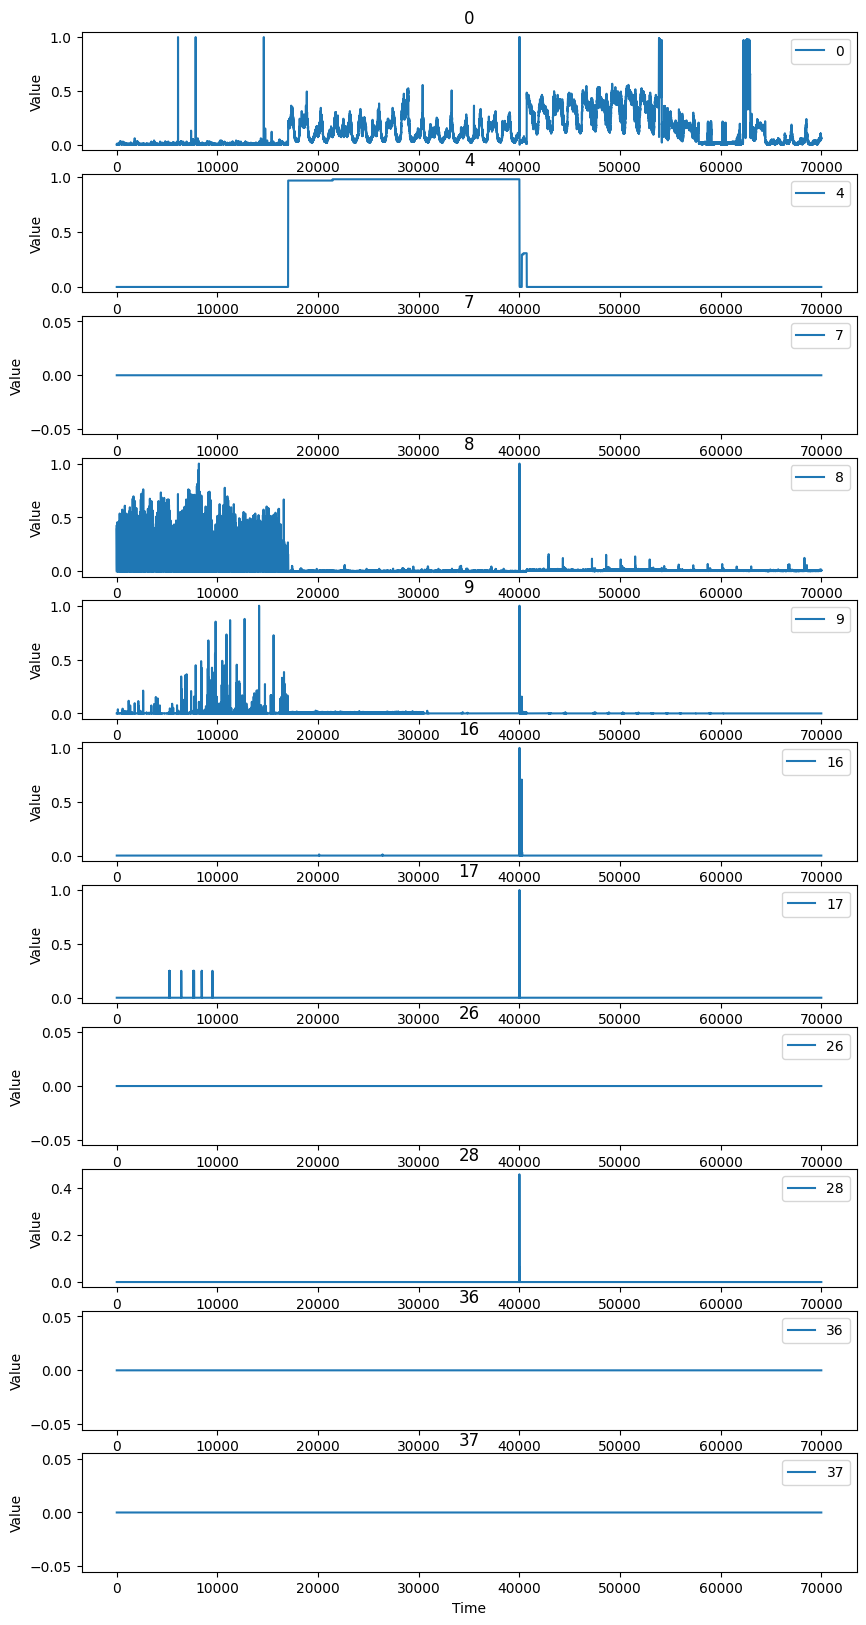

In [37]:
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

for i, feature in enumerate(test_data.columns):
    ax = axes[i]
    ax.plot(test_data.index, test_data[feature], label=feature)
    ax.set_title(feature)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()



In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [39]:
scaler = StandardScaler()
scaled_time_series_data = scaler.fit_transform(test_data)

In [44]:
pca = PCA(n_components=1)

In [45]:
pca.fit(scaled_time_series_data)

PCA(n_components=1)

In [46]:
transformed_data = pca.transform(scaled_time_series_data)

In [47]:
transformed_data

array([[-0.13172301],
       [ 2.37373729],
       [-0.13172301],
       ...,
       [-0.06119207],
       [-0.07444792],
       [-0.06564034]])

In [48]:
transformed_df = pd.DataFrame(transformed_data, columns=['feature'])


In [49]:
transformed_df

,feature
0,-0.131723
1,2.373737
2,-0.131723
3,-0.089260
4,-0.131723
...,...
69996,-0.063988
69997,-0.082734
69998,-0.061192
69999,-0.074448


<Axes: >

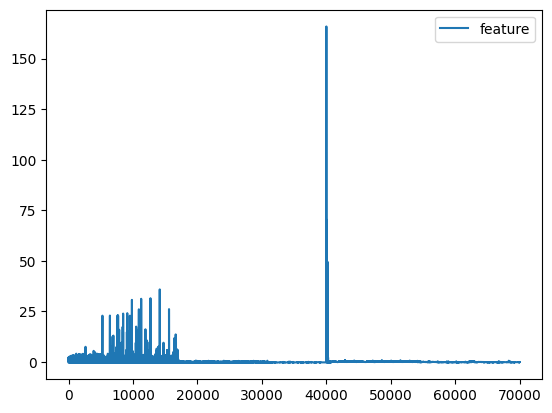

In [53]:
transformed_df.plot()


In [56]:
final_df=pd.concat([transformed_df,test_label],axis=1)

In [57]:
final_df.head()

,feature,0
0,-0.131723,0
1,2.373737,0
2,-0.131723,0
3,-0.089260,0
4,-0.131723,0


In [63]:
final_df.rename(columns={'0': 'is_anomali'}, inplace=True)

In [64]:
final_df.head()

,feature,is_anomali
0,-0.131723,0
1,2.373737,0
2,-0.131723,0
3,-0.089260,0
4,-0.131723,0


In [65]:
final_df['is_anomali'].value_counts()

is_anomali
0    65401
1     4600
Name: count, dtype: int64

In [68]:
anomaly_df = final_df.loc[final_df['is_anomali'] == 1]

In [69]:
anomaly_df

,feature,is_anomali
6082,0.048790,1
6083,-0.078612,1
6084,-0.078612,1
6085,0.355939,1
6086,0.486332,1
...,...,...
62937,-0.045081,1
62938,-0.048427,1
62939,-0.052853,1
62940,-0.057012,1


In [72]:
inlier_df = final_df.loc[final_df['is_anomali'] == 0]

In [73]:
inlier_df

,feature,is_anomali
0,-0.131723,0
1,2.373737,0
2,-0.131723,0
3,-0.089260,0
4,-0.131723,0
...,...,...
69996,-0.063988,0
69997,-0.082734,0
69998,-0.061192,0
69999,-0.074448,0


<Figure size 3000x3000 with 0 Axes>

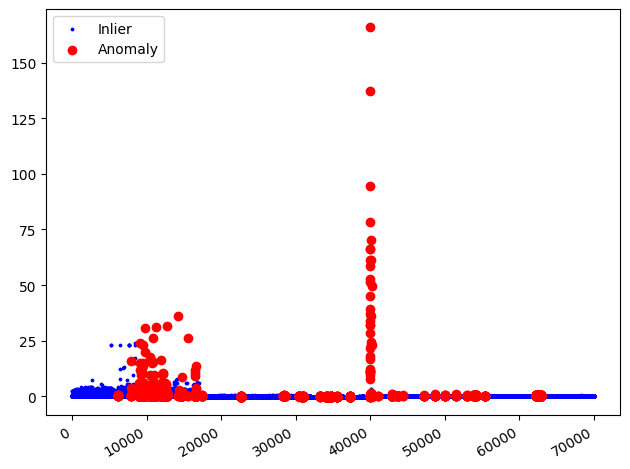

In [79]:
plt.figure(figsize=(30,30))
fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['feature'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['feature'], color='red', label='Anomaly')
ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [87]:
final_df['30_rolling']=final_df['feature'].rolling(window=10000,min_periods=1).mean()

In [88]:
final_df.head()

,feature,is_anomali,30_rolling
0,-0.131723,0,-0.131723
1,2.373737,0,1.121007
2,-0.131723,0,0.703430
3,-0.089260,0,0.505258
4,-0.131723,0,0.377862


<Axes: >

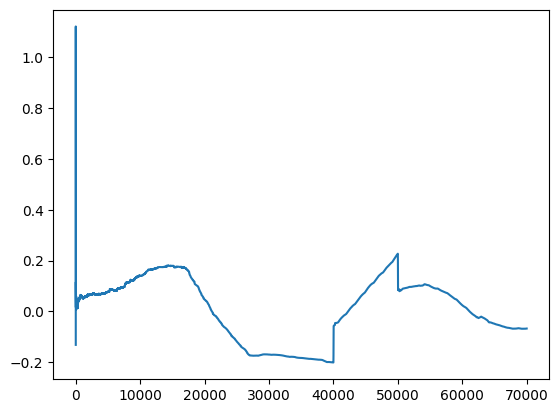

In [89]:
final_df['30_rolling'].plot()

In [91]:
final_df['CMA']=final_df['feature'].expanding().mean()

<Axes: >

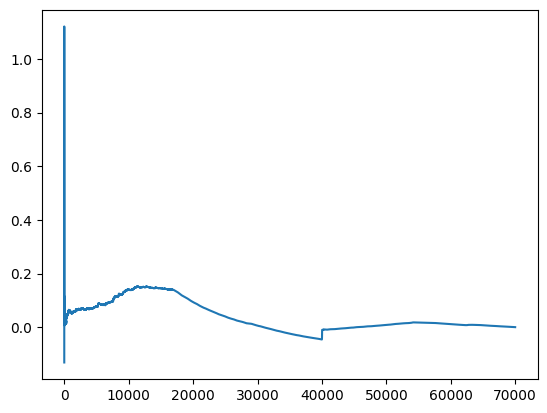

In [92]:
final_df['CMA'].plot()